#📌 Extracão

In [94]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"


dados = pd.read_json(url)


print(dados.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


#🔧 Transformação

In [95]:
churn_series = dados['Churn']


customer_df = pd.json_normalize(dados['customer'])
phone_df = pd.json_normalize(dados['phone'])
internet_df = pd.json_normalize(dados['internet'])
account_df = pd.json_normalize(dados['account'])


df = pd.concat([churn_series, customer_df, phone_df, internet_df, account_df], axis=1)


df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


df.fillna({'Charges.Monthly': 0, 'Charges.Total': 0, 'tenure': 0}, inplace=True)


print(df.head())


  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling



# 📊 Carga e análise

/tmp/ipython-input-2584539695.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Blues_d', edgecolor=None)


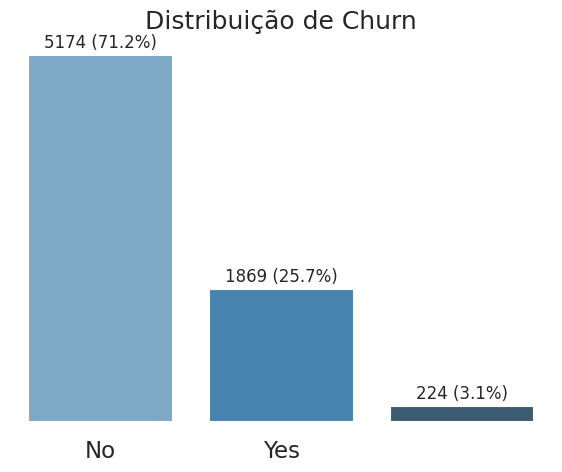

/tmp/ipython-input-2584539695.py:32: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=contract_churn, x='Contract', y='count', hue='Churn', palette=['#87CEEB','#4682B4'], edgecolor=None)


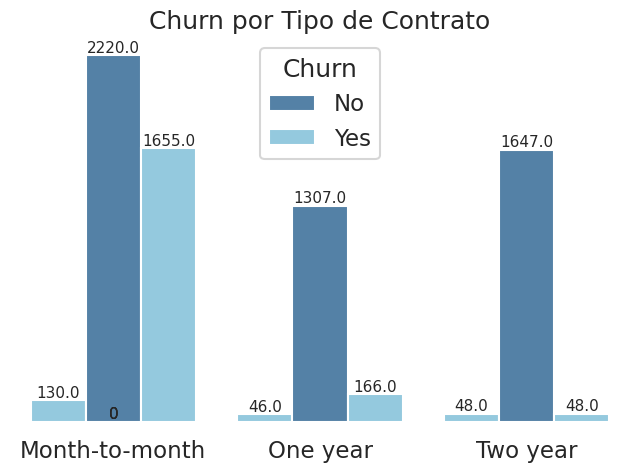

/tmp/ipython-input-2584539695.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Total', palette=['#ADD8E6','#4682B4'], fliersize=2)
/tmp/ipython-input-2584539695.py:51: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='Churn', y='Charges.Total', palette=['#ADD8E6','#4682B4'], fliersize=2)


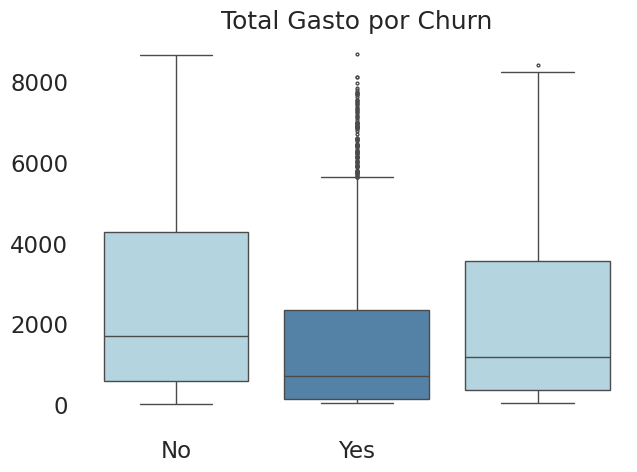

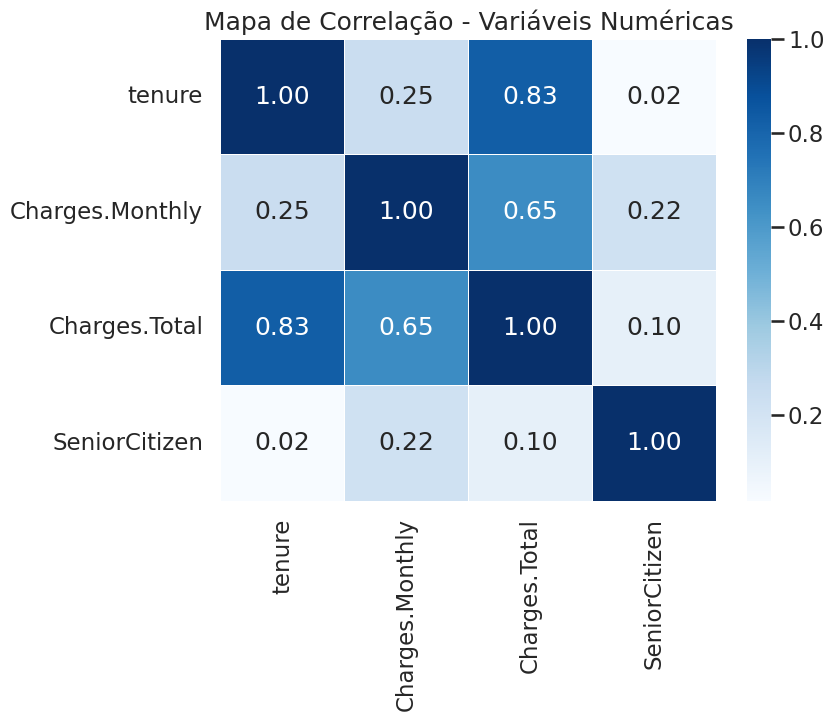

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('white')
sns.set_context('talk')


plt.figure(figsize=(7,5))
churn_counts = df['Churn'].value_counts()
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Blues_d', edgecolor=None)
sns.despine(left=True, bottom=True)
ax.set_yticks([])


total = churn_counts.sum()
for i, val in enumerate(churn_counts.values):
    ax.text(i, val + 50, f'{val} ({val/total:.1%})', ha='center', va='bottom', fontsize=12)

plt.title("Distribuição de Churn", fontsize=18)
plt.xlabel("")
plt.ylabel("")
plt.show()


plt.figure(figsize=(8,5))
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='count')
ax = sns.barplot(data=contract_churn, x='Contract', y='count', hue='Churn', palette=['#87CEEB','#4682B4'], edgecolor=None)
sns.despine(left=True, bottom=True)
ax.set_yticks([])


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height), ha='center', va='bottom', fontsize=11)

plt.title("Churn por Tipo de Contrato", fontsize=18)
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Churn")
plt.show()


plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Churn', y='Charges.Total', palette=['#ADD8E6','#4682B4'], fliersize=2)
sns.despine(left=True, bottom=True)
plt.title("Total Gasto por Churn", fontsize=18)
plt.xlabel("")
plt.ylabel("")
plt.show()


numericas = df[['tenure','Charges.Monthly','Charges.Total','SeniorCitizen']]
plt.figure(figsize=(8,6))
sns.heatmap(numericas.corr(), annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, cbar=True)
plt.title("Mapa de Correlação - Variáveis Numéricas", fontsize=18)
sns.despine(left=True, bottom=True)
plt.show()


#📄Relatorio Final

# **Introdução**:

Objetivo: Identificar padrões de evasão de clientes (Churn) na Telecom X.

Problema: A empresa não sabe por que está perdendo clientes.

Processo ETL:

Extração: Carregamos dados do JSON no GitHub.

Transformação: Normalizamos dados aninhados, convertendo colunas numéricas e tratando valores ausentes.

Carga/Análise: Dados consolidados em um dataframe único, pronto para análise exploratória.

Análise Exploratória:

Distribuição de clientes que saíram (Churn).

Churn por tipo de contrato: clientes com contratos curtos apresentam mais evasão.

Boxplot de gastos totais indica que clientes com menor gasto tendem a sair.

Mapa de correlação mostra relações entre variáveis numéricas (ex.: tenure, Charges.Total, Charges.Monthly).

Conclusões e Sugestões:

Focar em retenção de clientes com contrato curto e menor gasto.

Oferecer promoções ou pacotes personalizados para clientes de risco.

Monitorar uso de serviços adicionais e suporte técnico para aumentar satisfação.